In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix

In [2]:
data = pd.read_excel('car_evaluation.xlsx', header=None)
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
data.shape

(1728, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target']
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data['doors'].unique()

array([2, 3, 4, '5more'], dtype=object)

In [7]:
data['persons'].unique()

array([2, 4, 'more'], dtype=object)

Insight questions:
- High Price leads to high maintainance?
- Price and person capacity relation
- low safety, high maintainance?
- Proper Label Encoding

In [8]:
#Price vs maintainance
grouped_df = data.groupby(['buying', 'maint']).agg({'target':'count'})
grouped_df.columns = ['Count']
grouped_df

Count
buying maint       
high   high     108
       low      108
       med      108
       vhigh    108
low    high     108
       low      108
       med      108
       vhigh    108
med    high     108
       low      108
       med      108
       vhigh    108
vhigh  high     108
       low      108
       med      108
       vhigh    108

In [9]:
# Price and Person Capacity
grouped_df = data.groupby(['buying', 'persons']).agg({'target':'count'})
grouped_df.columns = ['Count']
grouped_df

Count
buying persons       
high   2          144
       4          144
       more       144
low    2          144
       4          144
       more       144
med    2          144
       4          144
       more       144
vhigh  2          144
       4          144
       more       144

In [10]:
# Maintainance and Safety Capacity
grouped_df = data.groupby(['maint', 'safety']).agg({'target':'count'})
grouped_df.columns = ['Count']
grouped_df

Count
maint safety       
high  high      144
      low       144
      med       144
low   high      144
      low       144
      med       144
med   high      144
      low       144
      med       144
vhigh high      144
      low       144
      med       144

In [11]:
# Maintainance and Safety Capacity
grouped_df = data.groupby(['target', 'safety']).agg({'doors':'count'})
grouped_df.columns = ['Count']
grouped_df

Count
target safety       
acc    high      204
       med       180
good   high       30
       med        39
unacc  high      277
       low       576
       med       357
vgood  high       65

In [12]:
priority_keys = {'low': 0, 'med': 1, 'high': 2, 'vhigh': 3,
                 'small': 0, 'big': 2, 'more': 6, '5more': 6}
target_keys = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}

cols_to_convert = ['buying', 'maint', 'lug_boot', 'doors', 'persons', 'safety']

def convert_df_to_numeric(row):
    for col in cols_to_convert:
        try:
            row[col] = priority_keys[row[col]]
        except:
            continue
    row['target'] = target_keys[row['target']]
    return row

data = data.apply(convert_df_to_numeric, axis = 1)
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


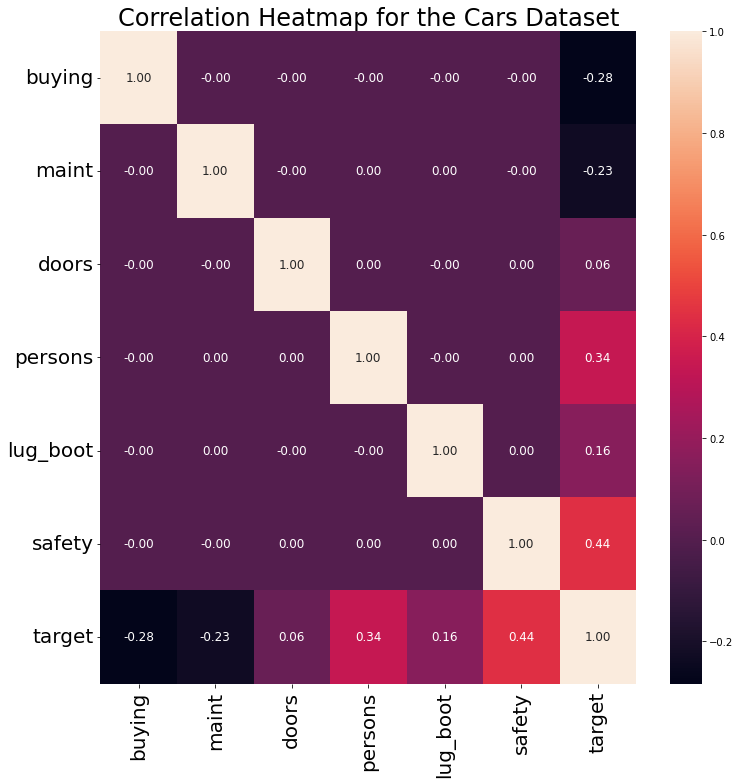

In [13]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, annot_kws = {"size": 12}, fmt='.2f')
plt.title('Correlation Heatmap for the Cars Dataset', size = 24)
plt.xticks(rotation = 90, size = 20)
plt.yticks(rotation = 0, size = 20)
plt.show()

In [14]:
X = data.drop(['target'], axis = 1)
y = data['target']

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.15, stratify = y)

In [15]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred = dt.predict(x_val)

print('Accuracy Score: ', accuracy_score(pred, y_val)*100)
print('F1 Score: ', f1_score(pred, y_val, average='macro'))

Accuracy Score:  97.3076923076923
F1 Score:  0.9085056689721762


/home/aryan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


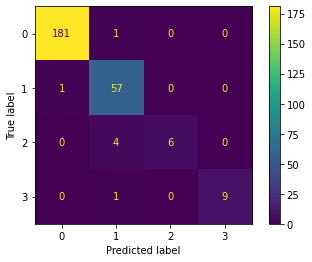

In [16]:
#plt.figure(figsize = (14, 14))
#sns.set(font_scale=1.5)
plot_confusion_matrix(dt, x_val, y_val)
#plt.show()

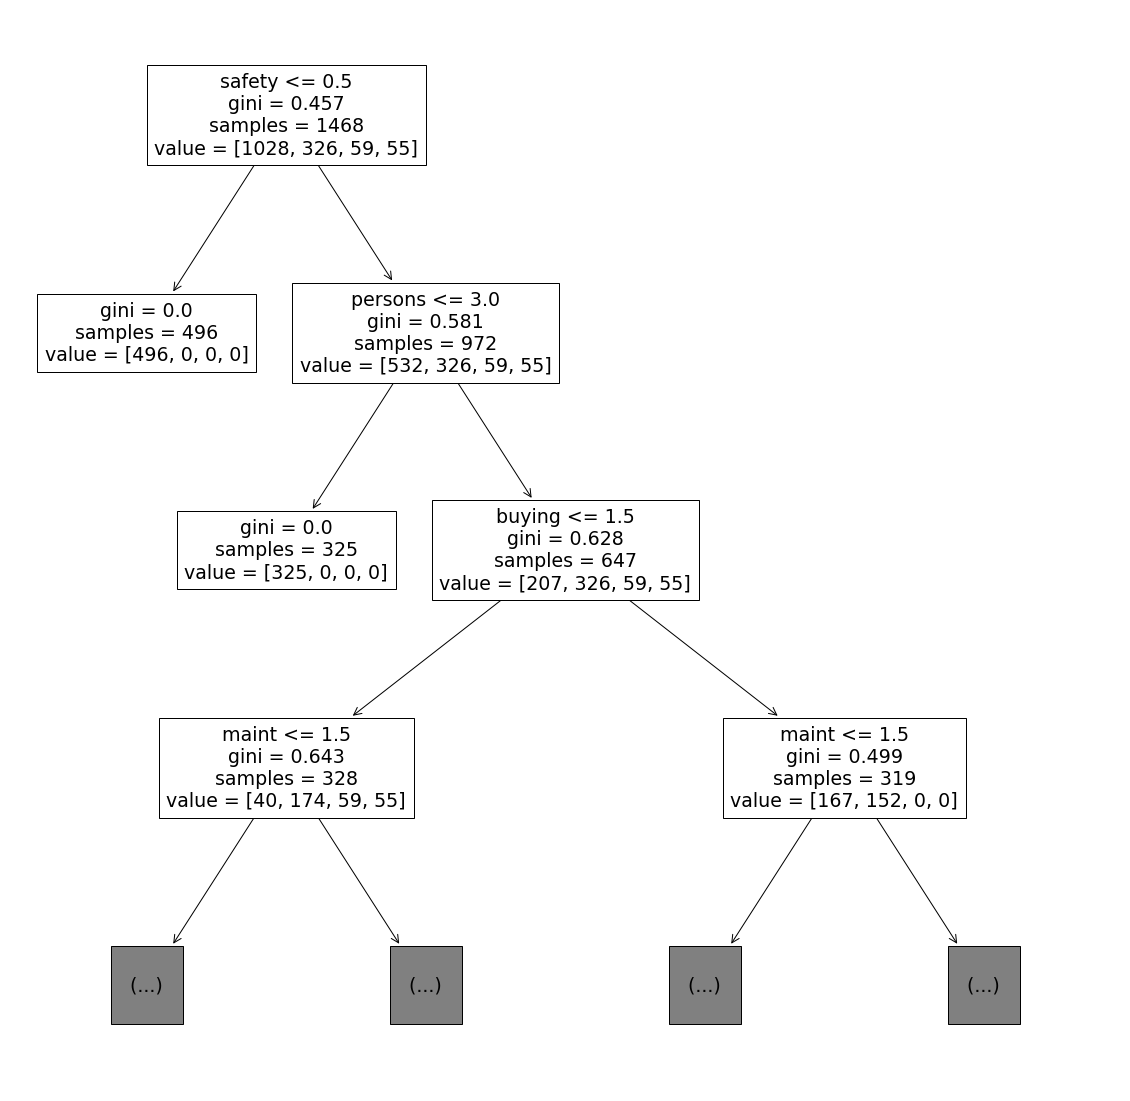

In [25]:
plt.figure(figsize= (20,20))
plot_tree(dt, max_depth = 3, feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
plt.show()